In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_directory = os.getcwd()
plot_directory = os.getcwd() + "\\Plots"

# P Control

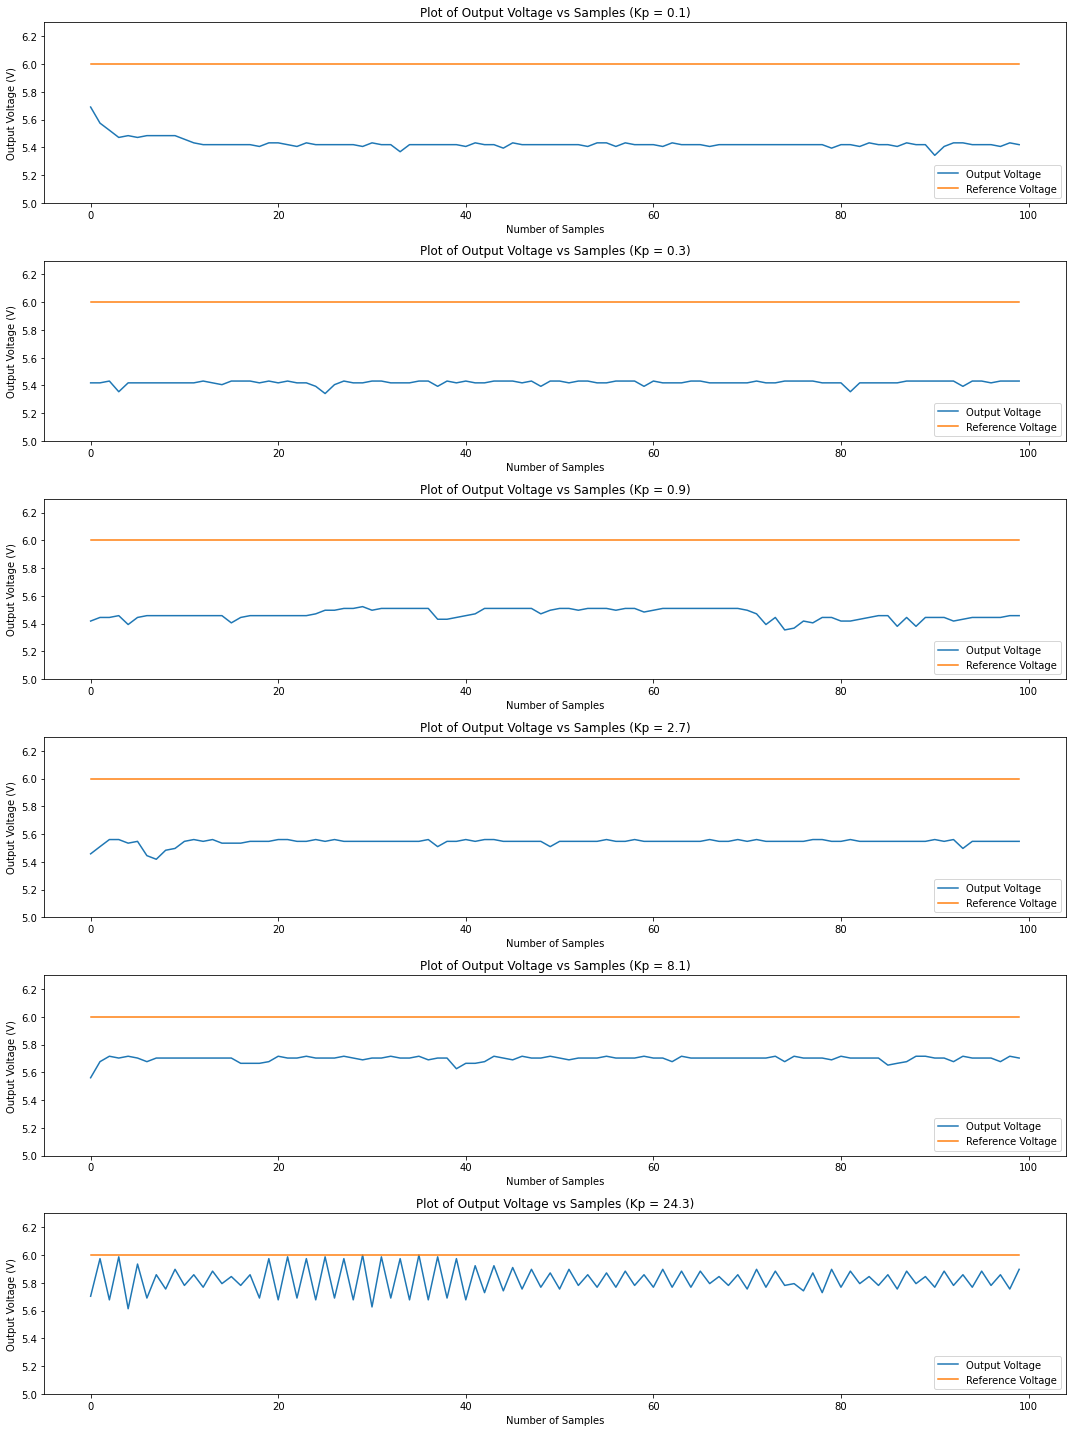

In [9]:
# Obtain P Values
P_Control_VaryKd_Data = pd.read_csv('P_Control_Data.txt', header = None)

# Put P Values in DataFrame
P_Control_VaryKd_Data_df = P_Control_VaryKd_Data.apply(lambda x: x.str.split(), axis='columns')
for column_name in P_Control_VaryKd_Data_df.columns:
    P_Control_VaryKd_Data_df[column_name] = pd.to_numeric(P_Control_VaryKd_Data_df[column_name].str[-1])
P_Control_VaryKd_Data_df.columns = ['y', 'w', 'error', 'Kp', 'Duty_Cycle']

# Group P values by different Kp
P_Control_Groups = P_Control_VaryKd_Data_df.groupby('Kp')
different_Kp_Values = list(P_Control_Groups.groups.keys())

# Plot the different Kp Values
fig, ax = plt.subplots(nrows=len(different_Kp_Values), figsize=(15,20))

for i in range(0, len(different_Kp_Values)):
    Kp_value = different_Kp_Values[i]
    y_data = P_Control_Groups.get_group(Kp_value)['y'].reset_index(drop=True)
    ax[i].plot(y_data, label = 'Output Voltage')
    ax[i].set_ylim([5, 6.3])
    ax[i].set_title('Plot of Output Voltage vs Samples (Kp = ' + str(Kp_value) + ')' )
    ax[i].set_ylabel('Output Voltage (V)')
    ax[i].set_xlabel('Number of Samples')
    ax[i].plot([6 for i in range(0,100)], label = 'Reference Voltage')
    ax[i].legend(loc=4)


fig.tight_layout()
plt.savefig(plot_directory + "\\P_Control.png")